<div id = "mylogo"><center> <img src="https://www.meilleurs-masters.com/uploads/program-logo/037a595e6f4f0576a9efe43154d71c18.jpg?v=1707996658", style="height:300px"></center></div>
<br>
<hr style="border-width:2px;border-color:#FFFFFF"><br>
<center> <h1>Modélisation Prédictive et Analyse Statistique de la Probabilité de Défaillance des Prêts</h1> </center>
<center> <h2>EDA & Data preprocessing</h2> </center>
<hr style="border-width:2px;border-color:#FFFFFF"><br>
<center> <h3>Issame Abdeljalil, Samanta Lamour, Alexis Christien, Marvin Kada-Sedode</h3> </center>
<center> <h5>Master 2 Modélisations Statistiques Economiques et Financières</h5> </center>
<center> <h5>Université Paris 1 Panthéon-Sorbonne</h5> </center>

In [1]:
# Importation des bibliothèques
import os
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from skimpy import skim

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    log_loss,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

import xgboost as xgb
from scipy.stats import chi2_contingency, mannwhitneyu

# Configuration des options d'affichage pour pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


<span style="color:darkred; font-size:24px;"><b><u>Analyse Exploratoire des données</u></b></span>

In [2]:
data_score_raw = pd.read_csv('data/hmeq.csv')
rows, columns = data_score_raw.shape
print(f"Le DataFrame contient {rows} lignes et {columns} colonnes.")

Le DataFrame contient 5960 lignes et 13 colonnes.


In [3]:
#Un résumé concis du dataframe
data_score_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Cette sortie de table fournit, d’une part, des informations sur les types de chaque variable et, d’autre part, permet de détecter la présence de valeurs manquantes dans les colonnes. C'est le cas par exemple de toutes les variables sauf LOAN et BAD

In [4]:
#Des statistiques plus lisibles des variables
skim(data_score_raw)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5960   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA    ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ BAD           │     0 │      0 │  0.1995 │  0.3997 │       0 │      0 │      0 │       0 │      1 │ ▇    ▂ │  │
│ │ LOAN          │     0 │      0 │   18610 │   11210 │    1100 │  11100 │  16300 │   23300 │  89900 │  ▇▇▁   │  │
│ │ MORTDUE       │   518 │   8.69 │   73760 │   44460 │    2063 │  46280 │  65020 │   91490 │ 399600 │  ▇▆▁   │  │
│ │ VALUE         │   112 │   1.88 │  101800 │   57390 │    8000 │  66080 │  89240 │  119800 │ 855900 │   ▇▁   │  │
│ │ YOJ           │   515 │   8.64 │   8.922 │   7.574 │       0 │      3 │      7 │      13 │     41 │  ▇▅▂▁  │  │
│ │ DEROG         │   708 │  11.88 │  0.2546 │   0.846 │       0 │      0 │      0 │       0 │     10 │   ▇    │  │
│ │ DELINQ        │   580 │   9.73 │  0.4494 │   1.127 │       0 │      0 │      0 │       0 │     15 │   ▇    │  │
│ │ CLAGE         │   308 │   5.17 │   179.8 │   85.81 │       0 │  115.1 │  173.5 │   231.6 │   1168 │   ▇▅   │  │
│ │ NINQ          │   510 │   8.56 │   1.186 │   1.729 │       0 │      0 │      1 │       2 │     17 │   ▇▁   │  │
│ │ CLNO          │   222 │   3.72 │    21.3 │   10.14 │       0 │     15 │     20 │      26 │     71 │  ▂▇▅▁  │  │
│ │ DEBTINC       │  1267 │  21.26 │   33.78 │   8.602 │  0.5245 │  29.14 │  34.82 │      39 │  203.3 │   ▇▇   │  │
│ └───────────────┴───────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴─────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA       ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ REASON                   │      252 │       4.23 │                         0.96 │                     5708 │  │
│ │ JOB                      │      279 │       4.68 │                         0.95 │                     5681 │  │
│ └──────────────────────────┴──────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
data_score_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


## <span style="color:darkred; font-size:24px;"><b><u> Interprétation des statistiques des variables</u></b></span>
BAD : Plus de 75% des individus ne sont pas en défaut, indiquant que la majorité des observations représentent des cas sans incidents. Une analyse plus détaillée sera effectuée ultérieurement pour explorer ces différences.

LOAN : La moyenne des montants de prêt est de 18 607, mais l’écart-type élevé révèle une variabilité significative entre les montants des prêts. Cela suggère la nécessité d’analyser plus en détail certaines valeurs, car elles pourraient être des valeurs extrêmes. Cette conclusion s'applique également aux variables MORTDUE (montant dû sur le prêt immobilier) et VALUE (valeur estimée de la propriété).

YOJ (Années au même emploi) : Les valeurs semblent globalement cohérentes. Les cas avec une valeur de 0 suggèrent que certains individus sont soit nouvellement employés, soit sans emploi. Ces valeurs mériteraient une attention supplémentaire.

DEROG (Remarques négatives) : En moyenne, les individus ont très peu de remarques négatives. Cela indique que les incidents graves sont rares dans cet échantillon.

DELINQ (Retards de paiement) : De manière similaire à DEROG, les retards de paiement sont peu fréquents en moyenne, ce qui montre une gestion des paiements relativement stable parmi les individus.

CLAGE (Âge du crédit) : La moyenne indique que les individus ont des crédits en cours depuis environ 15 ans. Cependant, la valeur maximale de 1168 mois (environ 97 ans) semble peu réaliste. Cette valeur devrait être vérifiée avec des experts du domaine pour évaluer s’il s’agit d’une anomalie ou d’une erreur de données.

NINQ (Nombre de demandes de crédit récentes) : En moyenne, les individus ont réalisé environ une demande de crédit récemment. Un nombre de demandes élevé pourrait indiquer un profil à risque ou une potentielle tentative de fraude, ce qui nécessiterait une enquête plus approfondie.

DEBTINC (Ratio dette/revenu) : En moyenne, les dettes représentent environ 33% des revenus des individus, ce qui reste raisonnable. Toutefois, la valeur maximale atteignant 203% dépasse largement le revenu de l’individu, ce qui pourrait être une anomalie ou un signe de difficulté financière importante. Une analyse plus poussée est nécessaire pour confirmer ces observations.

In [6]:
# Vérificationn des valeurs dupliquées
dup=data_score_raw.duplicated().sum()
print(f"Il y a {dup} valeur(s) dupliquée(s)")

Il y a 0 valeur(s) dupliquée(s)


# Analyse univariée sur la base de donnée complète

<span style="color:darkred; font-size:24px;"><b><u>Détection des valeurs manquantes</u></b></span>



In [7]:
def missing_values_summary(data):
    missing_sum = data.isnull().sum()
    missing_percentage = (missing_sum / len(data))
    missing_data = pd.DataFrame({
        'Nombre de valeurs manquantes': missing_sum,
        'Pourcentages de valeurs manquantes': missing_percentage
    })

    return missing_data
missing_values = missing_values_summary(data_score_raw)
print(missing_values)

         Nombre de valeurs manquantes  Pourcentages de valeurs manquantes
BAD                                 0                            0.000000
LOAN                                0                            0.000000
MORTDUE                           518                            0.086913
VALUE                             112                            0.018792
REASON                            252                            0.042282
JOB                               279                            0.046812
YOJ                               515                            0.086409
DEROG                             708                            0.118792
DELINQ                            580                            0.097315
CLAGE                             308                            0.051678
NINQ                              510                            0.085570
CLNO                              222                            0.037248
DEBTINC                          1267 

Répartion de la variable cible

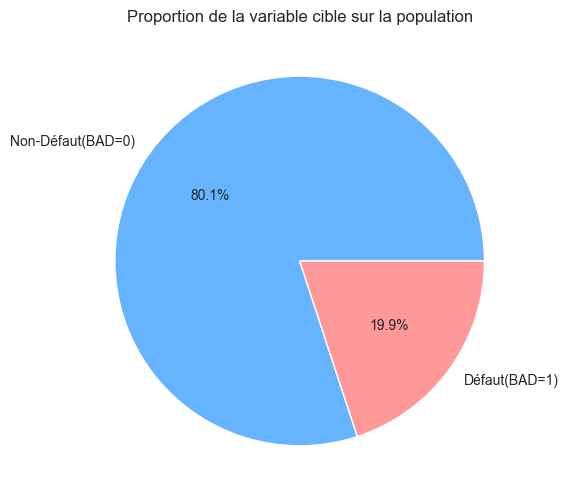

In [8]:
sns.set_style("whitegrid")


counts = data_score_raw['BAD'].value_counts()
labels = ['Non-Défaut(BAD=0)', 'Défaut(BAD=1)']
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Proportion de la variable cible sur la population')
plt.show()

Conclusion importante à tirer :

Il y a un déséquilibre significatif dans les données, avec une majorité de non-défaillants (80.1%) par rapport aux défaillants (19.9%). Ce déséquilibre peut affecter les performances des modèles de classification standard, qui pourraient être biaisés en faveur de la classe majoritaire.

Pour interpreter les performances de nos modeles : Il est recommandé d'utiliser des métriques d'évaluation adaptées au déséquilibre, telles que l'AUC-ROC, le rappel, la précision, ou la courbe Precision-Recall, plutôt que l'accuracy seule.

https://www.aquiladata.fr/insights/comment-gerer-le-desequilibre-des-classes-dans-un-jeu-de-donnees/

Distribution des variables avant imputation des outliers

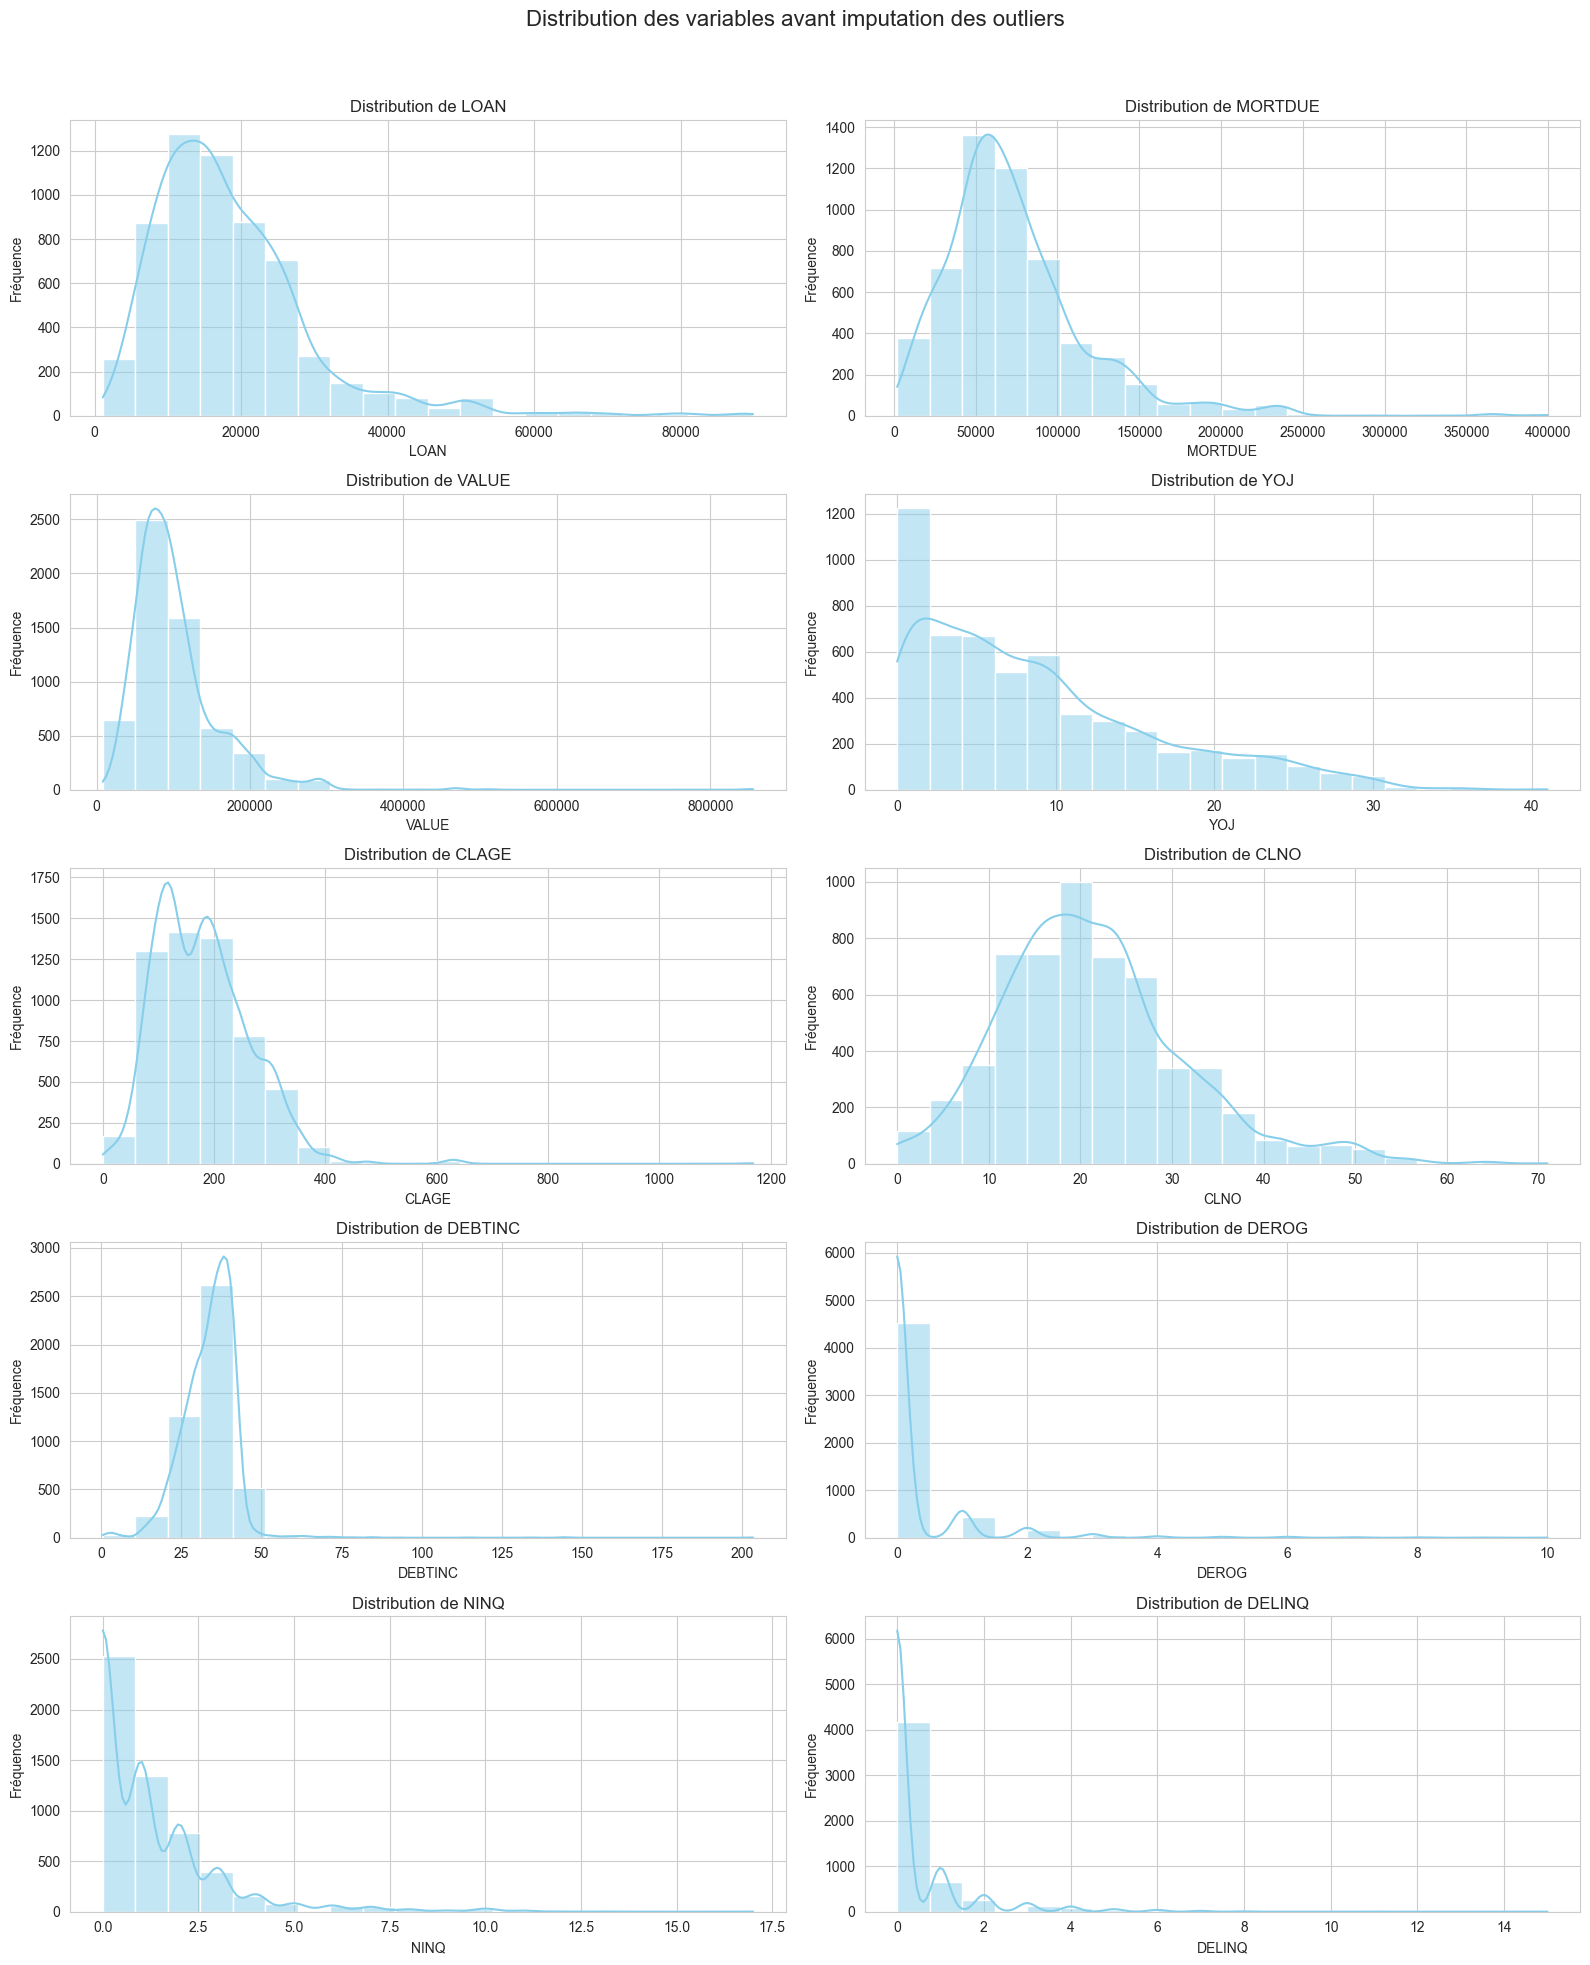

In [9]:
num_col = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'CLNO', 'DEBTINC', 'DEROG', 'NINQ', 'DELINQ']


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
fig.suptitle('Distribution des variables avant imputation des outliers', fontsize=16)

for i, col in enumerate(num_col):
    row = i // 2
    col_position = i % 2
    ax = axes[row, col_position]
    sns.histplot(data_score_raw[col], bins=20, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribution de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Fréquence')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Séparation de la base  de données en jeu d'entrainement et de test

In [10]:
#Séparation du jeu de données
data_train_raw, data_test_raw=train_test_split(data_score_raw,test_size=0.3,random_state=99,stratify=data_score_raw['BAD'])

#Vérification de la  représentativité de  l'échantillon dans la base de données d'entrainement avec l'indice de stabilité de population

In [11]:

def calculate_psi(expected, actual, bins=5):

    breakpoints = np.linspace(expected.min(), expected.max(), bins + 1)


    expected_percents = np.histogram(expected, bins=breakpoints)[0] / len(expected)
    actual_percents = np.histogram(actual, bins=breakpoints)[0] / len(actual)


    expected_percents = np.where(expected_percents == 0, 0.0001, expected_percents)
    actual_percents = np.where(actual_percents == 0, 0.0001, actual_percents)

    psi_values = (expected_percents - actual_percents) * np.log(expected_percents / actual_percents)
    psi = np.sum(psi_values)

    return psi

In [12]:
variables = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC']
for var in variables:
    psi_value = calculate_psi(data_train_raw[var], data_train_raw[var])
    print(f"PSI for {var}: {psi_value:.4f}")
    if psi_value < 0.1:
        print(f"Les distributions de {var} sont très similaires. L’échantillon est représentatif.\n")
    elif psi_value < 0.25:
        print(f"Léger changement dans les distributions de {var}. Une surveillance pourrait être nécessaire.\n")
    else:
        print(f"Changement significatif dans les distributions de {var}. L’échantillon n’est pas représentatif.\n")


PSI for LOAN: 0.0000
Les distributions de LOAN sont très similaires. L’échantillon est représentatif.

PSI for MORTDUE: 0.0000
Les distributions de MORTDUE sont très similaires. L’échantillon est représentatif.

PSI for VALUE: 0.0000
Les distributions de VALUE sont très similaires. L’échantillon est représentatif.

PSI for YOJ: 0.0000
Les distributions de YOJ sont très similaires. L’échantillon est représentatif.

PSI for CLAGE: 0.0000
Les distributions de CLAGE sont très similaires. L’échantillon est représentatif.

PSI for DEBTINC: 0.0000
Les distributions de DEBTINC sont très similaires. L’échantillon est représentatif.



# Analyse bivariée sur l'échantillon d'apprentissage

#### Toutes les analyses qui suivent se font sur l'échantillon d'entrainement

 a) Analyse bivariée pour les variables catégorielles

In [13]:
categorical_variables = ['REASON', 'JOB']

crosstabs = {}
for var in categorical_variables:
    crosstabs[var] = pd.crosstab(data_train_raw[var], data_train_raw['BAD'])
    print(f"Tableau croisé pour {var}:\n", crosstabs[var], "\n")


Tableau croisé pour REASON:
 BAD         0    1
REASON            
DebtCon  2220  527
HomeImp   984  273 

Tableau croisé pour JOB:
 BAD         0    1
JOB               
Mgr       410  127
Office    579   97
Other    1286  387
ProfExe   744  150
Sales      48   20
Self       92   34 



* Test du khi deux et v de cramer pour mésurer l'association entre variables catégorielle

* V de cramer : https://lemakistatheux.wordpress.com/2013/05/31/le-v-de-cramer/

Le V de Cramer permet de quantifier l'intensité de l'association, ce qui complète les résultats du test du chi-carré. Même si le test indique une association significative, le V de Cramer montre à quel point cette association est forte ou faible. Cela aide à comprendre l'importance des variables catégorielles pour la modélisation.

In [14]:

def cramers_v(chi2, n, dof):
    return np.sqrt(chi2 / (n * min(dof, n-1)))

categorical_variables = ['BAD','REASON', 'JOB']

association_results = []


for var1, var2 in itertools.combinations(categorical_variables, 2):

    crosstab = pd.crosstab(data_train_raw[var1], data_train_raw[var2])

    chi2_stat, p_val, dof, expected = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    v_cramer = cramers_v(chi2_stat, n, dof)


    if v_cramer < 0.1:
        association_strength = "Faible"
    elif v_cramer < 0.3:
        association_strength = "Modérée"
    elif v_cramer < 0.5:
        association_strength = "Relativement forte"
    else:
        association_strength = "Très forte"


    association_results.append({
        "Variable 1": var1,
        "Variable 2": var2,
        "Chi2 Statistique": round(chi2_stat, 3),
        "p-value": round(p_val, 3),
        "V de Cramer": round(v_cramer, 3),
        "Intensité de l'association": association_strength
    })

association_df = pd.DataFrame(association_results)


association_df


,Variable 1,Variable 2,Chi2 Statistique,p-value,V de Cramer,Intensité de l'association
0,BAD,REASON,3.306,0.069,0.029,Faible
1,BAD,JOB,40.223,0.000,0.045,Faible
2,REASON,JOB,92.320,0.000,0.069,Faible


* test de Tschuprow

Ici on mène le test de Tschuprow car cela permettra d'interpréter plus correctement la liason entre nos variables catégorielles lorsque celles-ci ont un nombre de modalités qui diffère

In [15]:
results = []


for var1, var2 in itertools.combinations(categorical_variables, 2):

    crosstab = pd.crosstab(data_train_raw[var1], data_train_raw[var2])


    chi2_stat, p_val, dof, expected = chi2_contingency(crosstab)
    n = crosstab.sum().sum()


    min_dim = min(crosstab.shape) - 1
    tschuprow_t = np.sqrt(chi2_stat / (n * min_dim))


    if tschuprow_t < 0.3:
        association_strength = "Faible"
    elif tschuprow_t < 0.5:
        association_strength = "Modérée"
    else:
        association_strength = "Forte"


    results.append({
        "Variable 1": var1,
        "Variable 2": var2,
        "Chi2 Statistique": round(chi2_stat, 3),
        "p-value": round(p_val,3),
        "T de Tschuprow": round(tschuprow_t,3),
        "Corrélation": association_strength
    })


results_df = pd.DataFrame(results)

results_df


,Variable 1,Variable 2,Chi2 Statistique,p-value,T de Tschuprow,Corrélation
0,BAD,REASON,3.306,0.069,0.029,Faible
1,BAD,JOB,40.223,0.000,0.101,Faible
2,REASON,JOB,92.320,0.000,0.154,Faible


* b) Analyse bivariée pour les variables numériques avec la variable cible

le test de Mann-Whitney U : pour comparer les distributions des variables numériques en fonction de la variable cible BAD , il ne suppose pas la normalité des données.Bien que ce test ne donne pas un coefficient de corrélation, un résultat significatif indique que la variable est associée à BAD de manière statistiquement significative.

In [16]:
numeric_features = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


mannwhitney_results = []

for var in numeric_features:

    group0 = data_train_raw[data_train_raw['BAD'] == 0][var].dropna()
    group1 = data_train_raw[data_train_raw['BAD'] == 1][var].dropna()


    u_stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')


    mannwhitney_results.append({
        "Variable": var,
        "U-statistique": round(u_stat, 3),
        "p-value": round(p_value, 3),
        "Conclusion": "Différence significative" if p_value < 0.05 else "Pas de différence significative"
    })

mannwhitney_df = pd.DataFrame(mannwhitney_results)


print("\nRésultats des tests de Mann-Whitney U pour les variables numériques :")
print(mannwhitney_df)



Résultats des tests de Mann-Whitney U pour les variables numériques :
  Variable  U-statistique  p-value                       Conclusion
0     LOAN      1614042.5      0.0         Différence significative
1  MORTDUE      1283634.5      0.0         Différence significative
2    VALUE      1405333.5      0.0         Différence significative
3      YOJ      1302728.0      0.0         Différence significative
4    DEROG       856385.0      0.0         Différence significative
5   DELINQ       775121.5      0.0         Différence significative
6    CLAGE      1561076.5      0.0         Différence significative
7     NINQ       938043.0      0.0         Différence significative
8     CLNO      1303291.5      0.4  Pas de différence significative
9  DEBTINC       288190.0      0.0         Différence significative


Note :

La p-value indique la probabilité que les distributions des deux groupes soient similaires.
Si la p-value est inférieure à 0.05, on conclut qu'il y a une différence significative entre les distributions des groupes BAD = 0 et BAD = 1 pour cette variable.
Si la p-value est supérieure à 0.05, il n'y a pas de différence significative entre les groupes.

Les variables présentant une différence significative (p-value < 0.05) peuvent être utiles pour expliquer la variable cible BAD, car leurs distributions varient de manière significative entre les groupes.
La variable CLNO ne montre pas de différence significative entre les groupes, ce qui suggère qu'elle est moins pertinente pour prédire BAD.

* Corrélation entre les variables numériques





1ère Méthode: Corrélation de Pearson

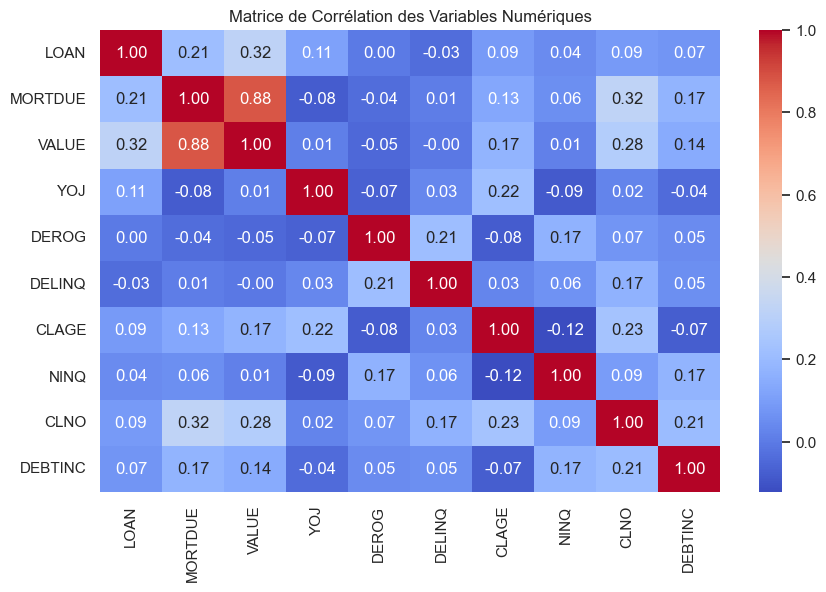

In [17]:

data_numeric = data_train_raw[numeric_features]


df_corr = data_numeric.corr(method="pearson")


sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.heatmap(df_corr,
                 xticklabels=df_corr.columns,
                 yticklabels=df_corr.columns,
                 cmap='coolwarm',
                 annot=True,
                 fmt=".2f")

plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()


2ème méthode: Corrélation de Spearman

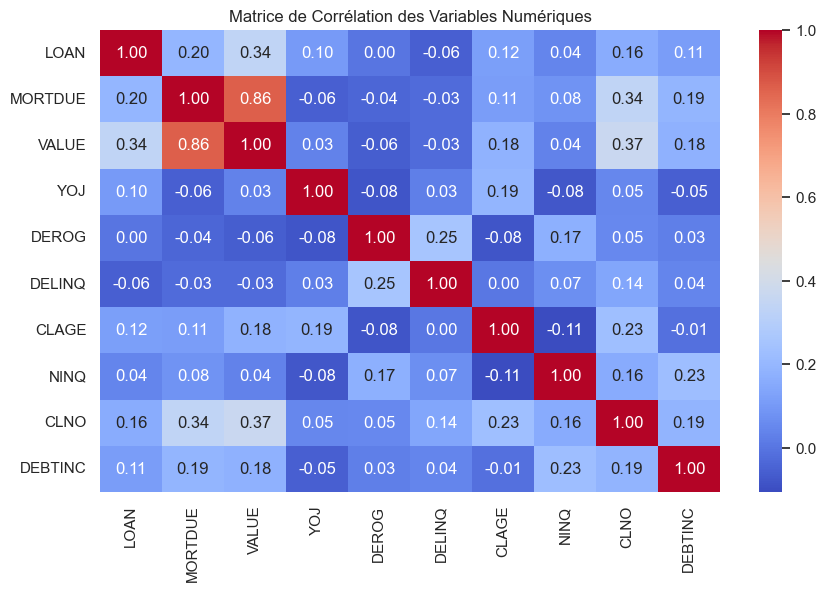

In [18]:

data_numeric = data_train_raw[numeric_features]

df_corr = data_numeric.corr(method="spearman")

sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.heatmap(df_corr,
                 xticklabels=df_corr.columns,
                 yticklabels=df_corr.columns,
                 cmap='coolwarm',
                 annot=True,
                 fmt=".2f")

plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()


* Corrélation entre les variables numériques et la  variable cible binaire



In [19]:
data_train_raw.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

# TRAITEMENT DES VALEURS MANQUANTES

### Pour le traitement des valeurs manquantes, nous adopterons une approche progressive en traitant chaque variable individuellement afin de les gérer de manière appropriée.

### Il convient dans un premier temps de vérifier la nature des valeurs manquantes à savoir, si elles sont complètement aléatoires (MCAR) ou si elles dépendent d'une ou de plusieurs autres (MAR) ou si elles dépendent de la variable elle-même (MNAR). Pour cela, le heatmap de Missingno  nous permet d'avoir un élément de réponse.

<Axes: >

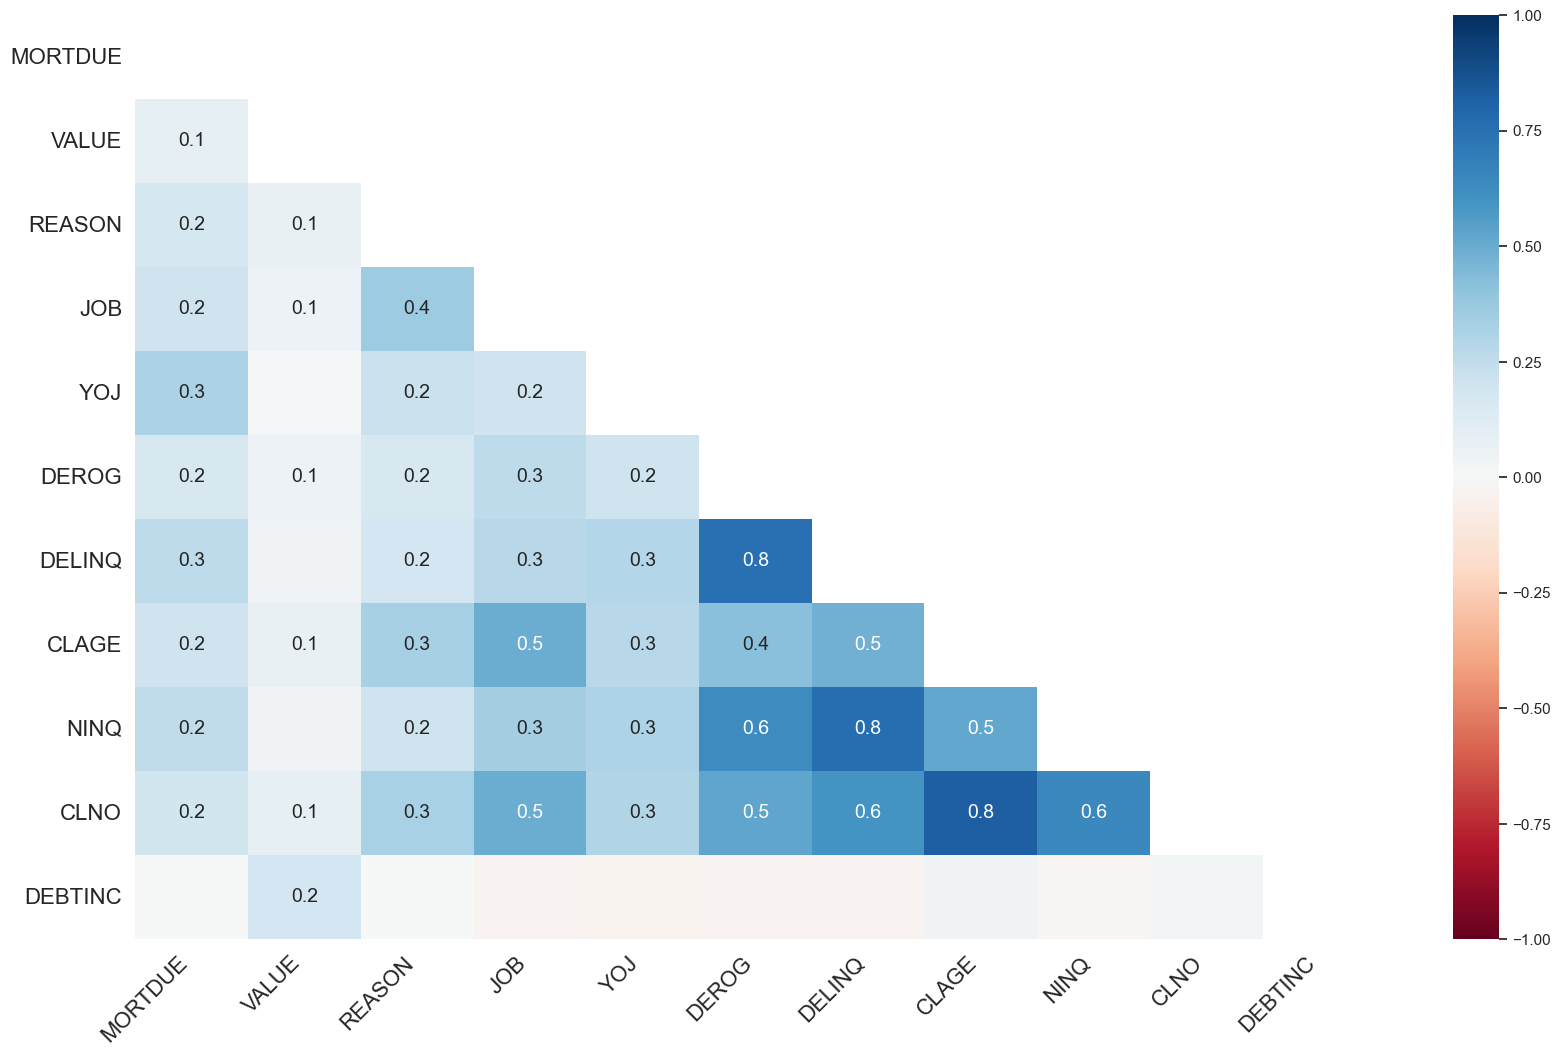

In [20]:
msno.heatmap(data_train_raw)

Lorsqu'une **corrélation significative** est observée entre les variables telles que **DELINQ et DEROG**, **NINQ et DELINQ**, ou encore **CLNO et CLAGE**, cela suggère que les valeurs manquantes sont de type **MAR** (Manquantes en fonction d'autres variables). Dans ce cas, il est approprié d'utiliser la méthode d’imputation par **KNN** (K-Nearest Neighbors), qui prend en compte les relations entre les variables pour une estimation plus précise.

En revanche, lorsque la **corrélation est faible**, comme c'est le cas pour les variables **VALUE**, **MORTDUE**, **REASON** et **JOB**, cela indique que les valeurs manquantes sont probablement de type **MCAR** (Manquantes de manière complètement aléatoire). Ces valeurs, étant distribuées de façon aléatoire, peuvent être imputées de manière fiable en utilisant la **médiane**, car elles ne dépendent pas des autres variables du jeu de données.





In [21]:

# Justification de la méthode d'imputation par la médiane
def coefficient_de_variation(df):
    numeric_df = df.select_dtypes(include='number')


    coeff_variation = numeric_df.std() / numeric_df.mean()*100

    return coeff_variation

In [22]:
coeffs_variation = coefficient_de_variation(data_train_raw)
print(coeffs_variation)

BAD        200.384269
LOAN        59.676189
MORTDUE     60.770161
VALUE       55.587384
YOJ         84.362100
DEROG      330.159060
DELINQ     248.011558
CLAGE       47.992888
NINQ       145.629197
CLNO        47.576453
DEBTINC     23.849664
dtype: float64


#### Le coefficient de variation (CV) fournit des informations sur la dispersion des données par rapport à leur moyenne. Lorsqu'un CV dépasse un seuil de 30%, cela indique une forte variabilité par rapport à la moyenne, ce qui signifie que les données sont très dispersées et moins prévisibles. Dans ce cas, il est préférable d'opter pour une imputation par la médiane, car celle-ci est moins sensible aux valeurs extrêmes et offre une estimation plus robuste de la tendance centrale, particulièrement utile lorsque les données sont très variées.

In [23]:
columns_to_impute = ['MORTDUE', 'VALUE', 'YOJ','DEBTINC']


imputer = SimpleImputer(strategy='median')

data_train_raw[columns_to_impute] =imputer.fit_transform(data_train_raw[columns_to_impute])
data_test_raw[columns_to_impute] = imputer.transform(data_test_raw[columns_to_impute])




print("Données d'entraînement après imputation :")
data_train_raw.isna().mean()

print("\nDonnées de test après imputation :")
data_test_raw.isna().mean()


Données d'entraînement après imputation :

Données de test après imputation :


BAD        0.000000
LOAN       0.000000
MORTDUE    0.000000
VALUE      0.000000
REASON     0.046980
JOB        0.045302
YOJ        0.000000
DEROG      0.117450
DELINQ     0.104586
CLAGE      0.050336
NINQ       0.091163
CLNO       0.039709
DEBTINC    0.000000
dtype: float64

#### Imputation par KNN

In [24]:
#On commence tout d'abord par standardiser les données afin qu'elles soient à la  même échelle
scaler = MinMaxScaler()

In [25]:
variables_to_impute_KNN = ['CLNO', 'CLAGE', 'NINQ', 'DEROG', 'DELINQ']

data_train_raw[variables_to_impute_KNN] = scaler.fit_transform(data_train_raw[variables_to_impute_KNN])
data_test_raw[variables_to_impute_KNN] = scaler.transform(data_test_raw[variables_to_impute_KNN])




In [26]:

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [27]:

data_train_raw[variables_to_impute_KNN] = imputer.fit_transform(data_train_raw[variables_to_impute_KNN])
data_test_raw[variables_to_impute_KNN] = imputer.transform(data_test_raw[variables_to_impute_KNN])

In [28]:

#Inverser la normalisation après imputation par KNN
data_train_raw[variables_to_impute_KNN] = scaler.inverse_transform(data_train_raw[variables_to_impute_KNN])
data_test_raw[variables_to_impute_KNN] = scaler.inverse_transform(data_test_raw[variables_to_impute_KNN])

In [29]:
data_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4172 entries, 5778 to 1408
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      4172 non-null   int64  
 1   LOAN     4172 non-null   int64  
 2   MORTDUE  4172 non-null   float64
 3   VALUE    4172 non-null   float64
 4   REASON   4004 non-null   object 
 5   JOB      3974 non-null   object 
 6   YOJ      4172 non-null   float64
 7   DEROG    4172 non-null   float64
 8   DELINQ   4172 non-null   float64
 9   CLAGE    4172 non-null   float64
 10  NINQ     4172 non-null   float64
 11  CLNO     4172 non-null   float64
 12  DEBTINC  4172 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 456.3+ KB


Le problème de la réalisation du KNNImputer est qu'il remplace par la moyenne des valeurs de ses voisins, ce qui n'est pas correct pour certaines variables dont les valeurs doivent être des entiers. Il faudra donc ensuite arrondir les valeurs de ces variables afin d'obtenir des nombres entiers.

In [30]:

for var in ['CLNO', 'CLAGE', 'NINQ', 'DEROG', 'DELINQ']:
    data_train_raw[var] = data_train_raw[var].round()
    data_test_raw[var] = data_test_raw[var].round()

In [31]:
columns_to_impute_mode = ['REASON','JOB']  # Spécifiez ici les colonnes avec NaN que vous voulez imputer


imputer_mode = SimpleImputer(strategy='most_frequent')


data_train_raw[columns_to_impute_mode] =imputer_mode.fit_transform(data_train_raw[columns_to_impute_mode])
data_test_raw[columns_to_impute_mode] = imputer_mode.transform(data_test_raw[columns_to_impute_mode])




print("Données d'entraînement après imputation :")
data_train_raw.isna().mean()

print("\nDonnées de test après imputation :")
data_test_raw.isna().mean()


Données d'entraînement après imputation :

Données de test après imputation :


BAD        0.0
LOAN       0.0
MORTDUE    0.0
VALUE      0.0
REASON     0.0
JOB        0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
DEBTINC    0.0
dtype: float64

On voit des variables dont les valeurs ne sont que des entiers ont pour type 'float'. Afin de s'assurer de la pertinence du code à suivre, il est préférable de les considérer comme des int.

In [32]:
# Les variables problématiques:
var_float_to_int = ['DEROG', 'CLNO', 'NINQ', 'DELINQ']
for var in var_float_to_int:
    data_train_raw[var] = data_train_raw[var].astype(int)
    data_test_raw[var] = data_test_raw[var].astype(int)
data_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4172 entries, 5778 to 1408
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      4172 non-null   int64  
 1   LOAN     4172 non-null   int64  
 2   MORTDUE  4172 non-null   float64
 3   VALUE    4172 non-null   float64
 4   REASON   4172 non-null   object 
 5   JOB      4172 non-null   object 
 6   YOJ      4172 non-null   float64
 7   DEROG    4172 non-null   int64  
 8   DELINQ   4172 non-null   int64  
 9   CLAGE    4172 non-null   float64
 10  NINQ     4172 non-null   int64  
 11  CLNO     4172 non-null   int64  
 12  DEBTINC  4172 non-null   float64
dtypes: float64(5), int64(6), object(2)
memory usage: 456.3+ KB


In [33]:
#Exportation des bases de données pour la régression logistique

# Chemin de destination
output_path_train_missing = 'data/train_missing.csv'
output_path_test_missing = 'data/test_missing.csv'

## Exporter le DataFrame en CSV
data_train_raw.to_csv(output_path_train_missing, index=False)
data_test_raw.to_csv(output_path_test_missing, index=False)

<span style="color:darkred; font-size:24px;"><b><u>Les Outliers (Valeurs Extrême et/ou Aberrantes)</u></b></span>

Détection par les Box-plot

In [34]:
var_num = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'CLNO', 'DEBTINC','DEROG', 'NINQ', 'DELINQ']
for var in var_num:
    fig = px.box(
        data_train_raw,
        x=var,
        color="BAD",
        labels={var: "Valeurs", "BAD": "Statut"},
        title=f"Boxplot de la colonne {var} en fonction de BAD"
    )
    fig.update_layout(
        xaxis_title=var,
        yaxis_title="Statut (BAD)"
    )
    fig.show()


Détection par la méthode IQR

In [35]:

global_outliers_dict = {}
def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_outliers = len(outliers)

    global_outliers_dict[column] = num_outliers

for var in var_num:
    detect_outliers_iqr(data_train_raw, var)

df_outliers_values = pd.DataFrame.from_dict(global_outliers_dict, orient='index', columns=['Outliers'])


print(df_outliers_values)
px.bar(df_outliers_values,
       labels = {'value':"Nombre d'Outliers",'index':'Variables'},
       title = "Nombre d'Outliers dans chaque colonnes numériques avec la méthode de l'IQR")


         Outliers
LOAN          171
MORTDUE       235
VALUE         250
YOJ           157
CLAGE          41
CLNO          150
DEBTINC       178
DEROG         621
NINQ          137
DELINQ        958


Décision sur  le Traitement des outliers :

La grande majorité des variables contiennent des valeurs extrêmes mais non aberrantes (selon nous). Nous décidons donc de ne pas toucher à ces valeurs car sources d'information.

Valeur aberrantes : Pour la variable CLAGE qui représente l'âge de la ligne de crédit la plus ancienne d'un client, en mois.
Un âge de 1 168 mois correspond à environ 97 ans (1 168 / 12 = 97,3).
il est extrêmement rare d'avoir une ligne de crédit qui remonte à 97 ans.
Car les produits de crédit tels que les cartes de crédit, les prêts hypothécaires ou les prêts personnels n'existaient pas sous leur forme actuelle il y a 97 ans.
Etant donnée que seulement 2 observations de la variable CLAGE nous semblent aberrantes, nous prenons la décision de les supprimer de notre base de données.

In [36]:
data_train_raw= data_train_raw[data_train_raw['CLAGE'] <= 700]
data_train_raw.shape

(4171, 13)

<span style="color:darkred; font-size:24px;"><b><u>Encodage des variables catégorielles : encodage one-hot</u></b></span>

In [37]:
features=['JOB', 'REASON']
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore").set_output(transform="pandas")

ohe.fit(data_train_raw[features])
data_train_raw[ohe.get_feature_names_out(features)] = ohe.transform(data_train_raw[features])
data_test_raw[ohe.get_feature_names_out(features)] = ohe.transform(data_test_raw[features])


# Supprimer les colonnes JOB et REASON et MORTDUE

In [38]:
# Supprimer les colonnes JOB et REASON et MORTDUE dans l'ensemble d'entraînement et de test
data_train = data_train_raw.drop(columns=['JOB', 'REASON','MORTDUE'])
data_test = data_test_raw.drop(columns=['JOB', 'REASON','MORTDUE'])


In [39]:
# Chemin de destination
output_path_train = 'data/data_train.csv'
output_path_test = 'data/data_test.csv'

# Exporter le DataFrame en CSV
# data_train.to_csv(output_path_train, index=False)
# data_test.to_csv(output_path_test, index=False)